In [1]:
from matplotlib import pyplot
from collections import Counter

pyplot.style.use("seaborn")
pyplot.rcParams['savefig.dpi'] = 200
pyplot.rcParams["figure.autolayout"] = True

POSITIONS = list("12345678")
SYMBOLS = list("0123456789+-/*=")

### Generating possible answers

I generated all possible answers using the code in `nerdle.py`. This should be the same as the possible nerdle answers, as the number generated (17723) is the same as the number of possible solutions mentioned on the nerdle website.

Some rules are covered [in the nerdle faq](https://faqs.nerdlegame.com/), but here's a summary:
 - The result (after =) must be a positive integer or 0.
 - Division is treated as normal division (not integer division/no rounding).
 - Lone 0's are not allowed in the LHS.
 - Trailing 0's are not allowed anywhere.
 - Negative numbers cannot be used (and you cannot use + as a unary operator) anywhere.
 - Order of operations apply.


In [2]:
with open("all_answers.txt", "r") as f:
    data = f.read().splitlines()

print(data[:5])
print(len(data))

['1*1+9=10', '1*10-1=9', '1*10-2=8', '1*10-3=7', '1*10-4=6']
17723


In [3]:
frequencies: dict[int, Counter[str, int]]= {}
for equation in data:
    for pos, char in enumerate(equation, 1):
        frequencies.setdefault(pos, Counter())[char] += 1

# frequencies[4] gives total counts for each symbol at the 4th position in the equation.
frequencies[4].most_common(5)

[('1', 2017), ('2', 1949), ('3', 1645), ('+', 1606), ('4', 1547)]

#### Frequency of each symbol across all answers

Shows the probability that, if you pick a random character from a random answer, it will be that symbol

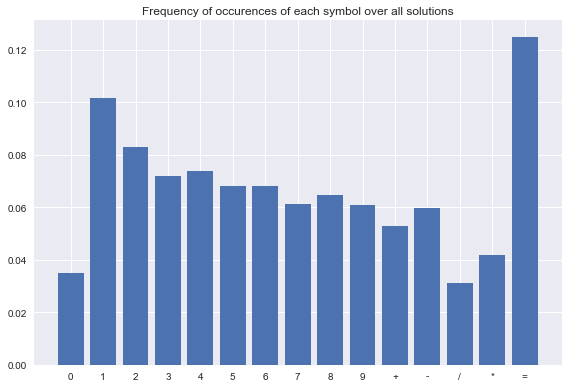

In [4]:
fig, ax = pyplot.subplots()

totals = []
for symbol in SYMBOLS:
    total = sum(position[symbol] for position in frequencies.values())
    totals.append(total)

total_sum = sum(totals)
totals = [i / total_sum for i in totals]

ax.set_title("Frequency of occurences of each symbol over all solutions")
ax.bar(SYMBOLS, totals)

fig.savefig("plots/symbol_frequency.jpg")

#### Probability of each symbol occuring

Similar to the last one, although only takes into account whether the symbol occurs *somewhere* in the solution, not how many times it occurs.

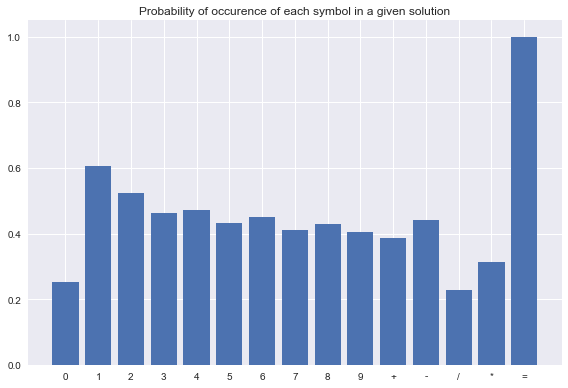

In [5]:
fig, ax = pyplot.subplots()

totals = []
for symbol in SYMBOLS:
    totals.append(sum(symbol in line for line in data) / len(data))

ax.set_title("Probability of occurence of each symbol in a given solution")
ax.bar(SYMBOLS, totals)

fig.savefig("plots/symbol_probability.jpg")

#### Frequency of occurence of each symbol in a given position

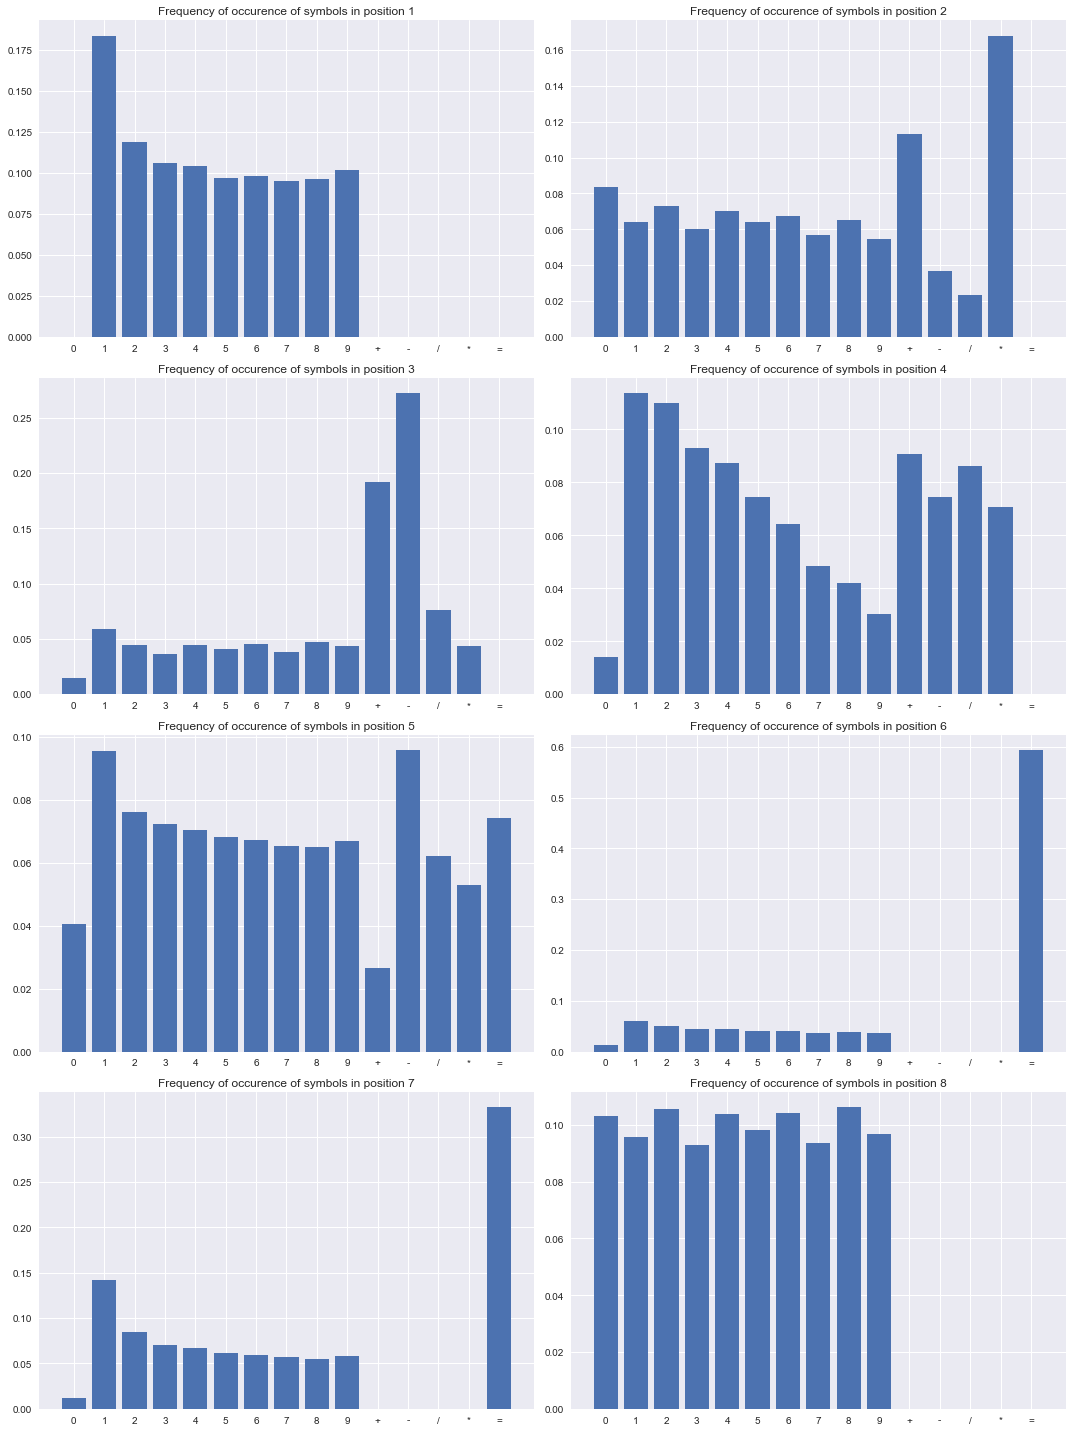

In [6]:
fig, ax = pyplot.subplots(nrows=4, ncols=2)
ax = ax.flatten()

fig.set_figheight(20)
fig.set_figwidth(15)

for n, position in enumerate(POSITIONS):
    totals = []
    for symbol in SYMBOLS:
        totals.append(frequencies[int(position)][symbol])

    totals = [i / len(data) for i in totals]

    ax[n].set_title(f"Frequency of occurence of symbols in position {position}")
    ax[n].bar(SYMBOLS, totals)

fig.savefig("plots/frequency_of_symbols_per_position.jpg")

#### Probability of occuring in a given position per symbol

This shows, for each symbol, the probability that it will be in a given position in the answer

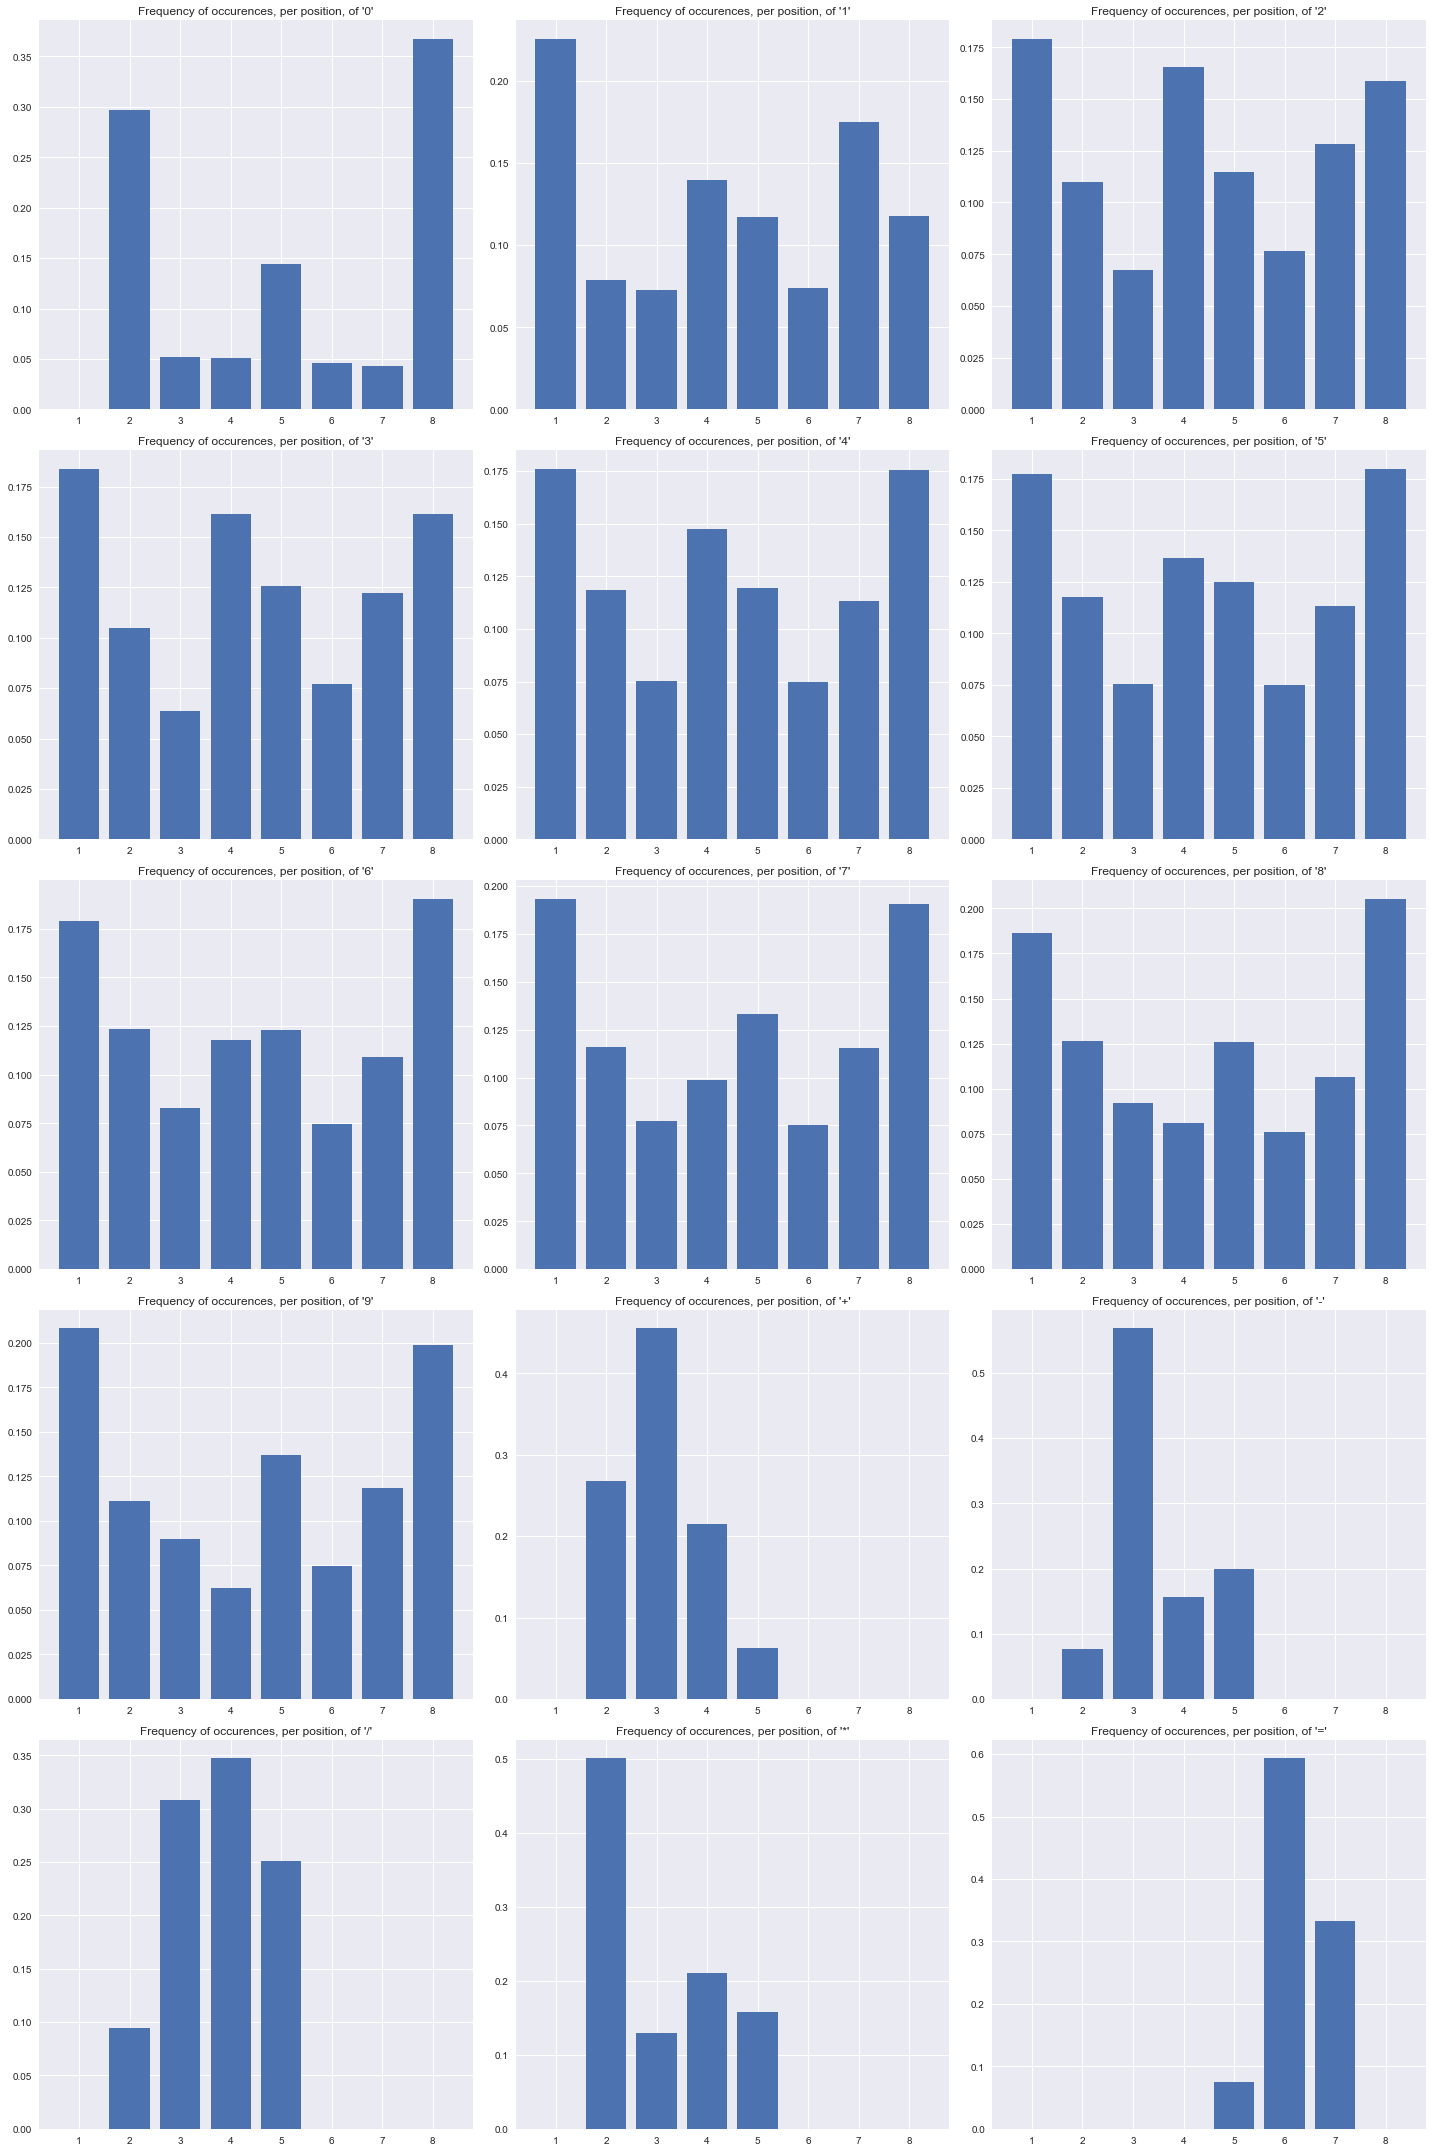

In [7]:
fig, ax = pyplot.subplots(nrows=5, ncols=3)
ax = ax.flatten()

fig.set_figheight(30)
fig.set_figwidth(20)
for n, symbol in enumerate(SYMBOLS):
    totals = []
    for position in POSITIONS:
        totals.append(frequencies[int(position)][symbol])

    total_sum = sum(totals)
    totals = [i / total_sum for i in totals]

    ax[n].set_title(f"Frequency of occurences, per position, of '{symbol}'")
    ax[n].bar(POSITIONS, totals)

fig.savefig("plots/frequency_of_positions_per_symbol.jpg")

#### Permutations of operators by frequency

This shows the probability that a result will be made up of operators in a given order. For example `+` would be any answers involving just a `+` such as `12+34=46`. There are 20 possibilites

In [8]:
operator_orders = Counter()

for line in data:
    order = ''.join(i for i in line if i not in "0123456789").rstrip("=")
    operator_orders[order] += 1 / len(data)

for pos, (form, prob) in enumerate(operator_orders.most_common(), 1):
    print(f'{pos:>2}) {form}: {prob*100:5.2f}%')

 1) +: 18.79%
 2) -: 18.79%
 3) /:  6.93%
 4) *:  6.93%
 5) *-:  5.86%
 6) -*:  4.01%
 7) --:  3.89%
 8) /-:  3.83%
 9) *+:  3.68%
10) +*:  3.68%
11) ++:  3.64%
12) +-:  2.96%
13) -+:  2.96%
14) */:  2.60%
15) /*:  2.60%
16) **:  2.11%
17) //:  2.11%
18) -/:  1.77%
19) +/:  1.44%
20) /+:  1.44%


#### Most Frequent Answer Formats

Similar to the last one, although more interesting as it takes into account the number of digits between operators too. There are 44 possibilities.

In [9]:
operator_orders = Counter()

for line in data:
    order = ''.join("x" if i in "0123456789" else i for i in line)
    operator_orders[order] += 1 / len(data)


for pos, (form, prob) in enumerate(operator_orders.most_common(), 1):
    print(f'{pos:>2}) {form}: {prob*100:5.2f}%')

 1) xx+xx=xx: 18.28%
 2) xx-xx=xx: 18.28%
 3) xx-x*x=x:  4.01%
 4) xx-x-x=x:  3.89%
 5) xx/x-x=x:  3.83%
 6) x*x+x=xx:  3.68%
 7) x+x*x=xx:  3.68%
 8) x+x+x=xx:  3.64%
 9) xxx/xx=x:  3.46%
10) xxx/x=xx:  3.46%
11) xx*x=xxx:  3.46%
12) x*xx=xxx:  3.46%
13) x*x-xx=x:  2.84%
14) x*x-x=xx:  2.51%
15) x*x*x=xx:  2.11%
16) xx/x/x=x:  2.11%
17) x-xx/x=x:  1.38%
18) x+xx/x=x:  1.05%
19) xx/x+x=x:  1.05%
20) x+x-xx=x:  0.93%
21) x-xx+x=x:  0.93%
22) x+xx-x=x:  0.68%
23) x-x+xx=x:  0.68%
24) xx+x-x=x:  0.68%
25) xx-x+x=x:  0.68%
26) x+x-x=xx:  0.68%
27) x-x+x=xx:  0.68%
28) x*xx/x=x:  0.65%
29) x/x*xx=x:  0.65%
30) xx*x/x=x:  0.65%
31) xx/x*x=x:  0.65%
32) x*x/xx=x:  0.65%
33) x*x/x=xx:  0.65%
34) x/x*x=xx:  0.65%
35) x/xx*x=x:  0.65%
36) x+x/x=xx:  0.39%
37) x/x+x=xx:  0.39%
38) xx-x/x=x:  0.39%
39) x*xx-x=x:  0.25%
40) x+xx=xxx:  0.25%
41) xx*x-x=x:  0.25%
42) xxx-x=xx:  0.25%
43) xxx-xx=x:  0.25%
44) xx+x=xxx:  0.25%
